____
# 1. 환경설정

## 1) 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) 한글 출력 세팅

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

## 3) import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

____

# 2. 미션 개요

## 1) 목표

- Resort Hotel과 City Hotel의 예약 데이터를 분석
- 예약 취소율에 영향을 미치는 요인을 파악
- 예약 취소율 감소를 위한 전략 및 아이디어 도출

## 2) 데이터 설명
- 기간: 2015년 7월 1일 ~ 2017년 8월 31일
- 호텔 종류: Resort Hotel, City Hotel
- 주요 변수 : **TODO❗️**

## 3) 문제 배경
- 예약 취소는 호텔 수익성에 큰 영향을 미친다.
- 예약 취소와 관련 요소 파악 후 취소율을 예측하고 감소시키는 것이 목표

____

# 3. 데이터 분석

## 1) 전처리

### (1) csv 파일 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/코드잇/미션2/hotel_data_modified.csv")

### (2) 데이터 구조 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### ① Dtype 확인 및 변경

In [ ]:
df['arrival_date_month']

,arrival_date_month
0,July
1,July
2,July
3,July
4,July
...,...
119385,August
119386,August
119387,August
119388,August


###(3) 결측값 확인

In [ ]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

In [ ]:
missing_ratio = df.isnull().mean().sort_values(ascending=False) # ascending=False : 비율이 큰 것부터 내림차순 정렬
print(missing_ratio)

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
is_canceled                       0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
stays_in_weekend_nights           0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
hotel                             0.000000
meal                              0.000000
babies                            0.000000
adults                            0.000000
market_segment                    0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
assigned_room_type                0.000000
reserved_room_type                0.000000
booking_cha

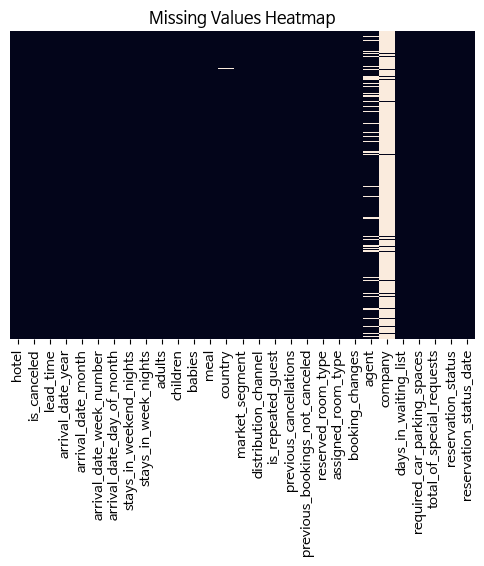

In [ ]:
# 결측값 시각화 - 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

🔎 ['company']

    📋 데이터 의미
       - 예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID
       - 범주형

    🔬 데이터 분석
       - 결측률 : 94.3%

    ➡️ 진행 방향
       - 우선 ['company'] 컬럼은 제외하고 분석한다.

In [ ]:
print(np.sort(df['agent'].unique()))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  44.
  45.  47.  50.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  63.
  64.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  77.  78.  79.
  81.  82.  83.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  98.  99. 103. 104. 105. 106. 107. 110. 111. 112. 114. 115. 117.
 118. 119. 121. 122. 126. 127. 128. 129. 132. 133. 134. 135. 138. 139.
 141. 142. 143. 144. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 162. 163. 165. 167. 168. 170. 171. 173. 174. 175.
 177. 179. 180. 181. 182. 183. 184. 185. 187. 191. 192. 193. 195. 196.
 197. 201. 205. 208. 210. 211. 213. 214. 215. 216. 219. 220. 223. 227.
 229. 232. 234. 235. 236. 240. 241. 242. 243. 244. 245. 247. 248. 249.
 250. 251. 252. 253. 254. 256. 257. 258. 261. 262. 265. 267. 269. 270.
 273. 


🔎 ['agent']

    📋 데이터 의미
       - 예약을 진행한 여행사의 ID
       - 수치형
    
    🔬 데이터 분석
       - 결측률 : 13.6%
       - 결측치 비율이 13.6%는 작지 않아서 삭제 시 데이터 손실이 큼.
       - 하지만, '여행사의 ID'는 범주형 코드이므로, 대표값을 넣는 건 의미 없음.
    
    ➡️ 진행 방향
       - agent를 거치지 않고, 직접 예약한 방법일 수 있으므로, "0"로 결측값을 채우는 게 낫다.





🔎 ['country']

    📋 데이터 의미
       - 투숙객의 출신 국가
       - 국가코드 : 카테고리는 ISO 3155-3:2013 형식으로 표시

    🔬 데이터 분석
       - 결측률 : 0.4%
       - 누락된 데이터일 가능성

    ➡️ 진행 방향
       - 누락된 데이터일 가능성과 다른 컬럼의 데이터가 유의미하므로, "Unknown"으로 대체하는 게 낫다.

🔎 ['children'] (1차)

    📋 데이터 의미
       - 어린이 투숙 인원
       - 예약된 어린이의 수

    🔬 데이터 분석
       - 이산형 정수값
       - 결측률 : 0.0034%
       ➡️ 대표값을 정해야한다.

#### ① ['children'] 대표값 정하기

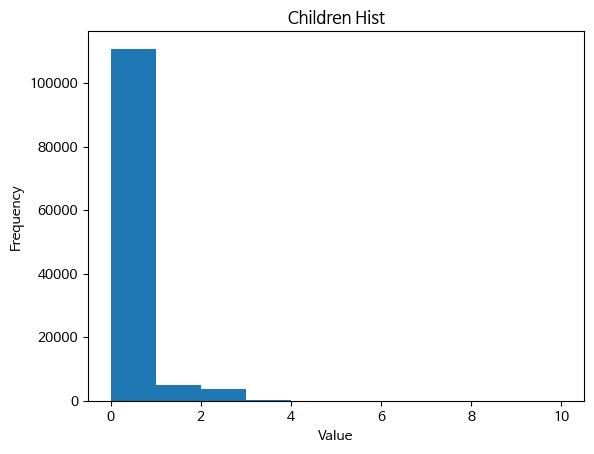

In [ ]:
plt.hist(df['children'])
plt.title("Children Hist")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("중앙값:")
print(df['children'].mean())

중앙값:
0.10388990333874994


🔎 ['children'] (2차)

    📋 데이터 의미
       - 어린이 투숙 인원
       - 예약된 어린이의 수

    🔬 데이터 분석
       - 이산형 정수값
       - 결측률 : 0.0034%
       - 평균값 : 0.103명
       ➡️ 0.1명은 이산형 정수값에서 의미없다.
       ➡️ 실수로 입력을 하지 않았거나, 없어서 미기입으로 판단됨.
    
    ➡️ 진행 방향
       - 결측치가 매우 적고(0.0034%), 실수 또는 "어린이 없음"으로 간주되고,
       0.1은 0으로 대체해도 무방하므로, 0으로 대체한다.

### (4) 결측치 처리

In [ ]:
df.drop(columns=["company"], inplace=True)

In [ ]:
df['agent'] = df['agent'].fillna(0)

In [ ]:
df['country'] = df['country'].fillna("UNKNOWN")

In [ ]:
df['children'] = df['children'].fillna(0)

In [ ]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

____

In [ ]:
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,10,12,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,A,A,NaN,NaN,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,NaN,85994,74053,NaN,NaN,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.137097,NaN,NaN,0.221124,74.828319,2.321149,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,1.497437,NaN,NaN,0.652306,107.141953,17.594721,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,NaN,0.000000,7.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,NaN,0.000000,9.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,NaN,NaN,0.000000,152.000000,0.000000,0.000000,1.000000,NaN,NaN


###(5) 결측값 재확인

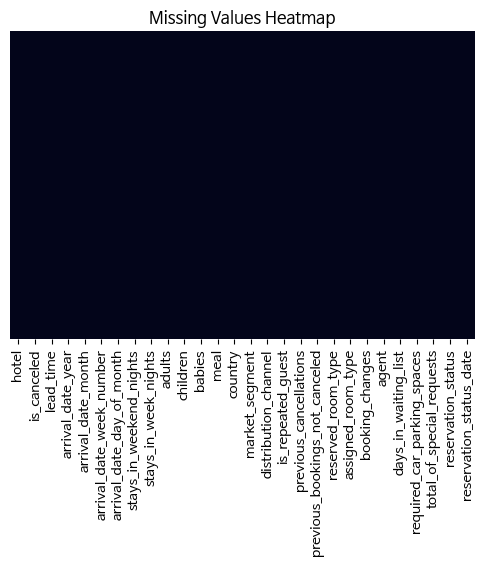

In [ ]:
# 결측값 시각화 - 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

##2) 중복값 처리

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [ ]:
df[df.duplicated()]  # 중복된 행 전체 보기

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,240.0,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,0,A,A,1,250.0,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,E,E,0,250.0,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,D,D,0,240.0,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,A,A,0,240.0,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,D,D,0,9.0,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,D,D,0,9.0,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,D,D,0,9.0,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,D,D,0,9.0,0,0,2,Check-Out,2017-09-03


In [ ]:
print(df.duplicated().sum()) # 중복행 갯수

33119


In [ ]:
df = df.drop_duplicates() # 중복 제거

In [ ]:
len(df)

86271

📊 데이터 정제 요약

    ✅ raw data : 119,390개
    ⚠️ duplicated data : 33,119개
    🔆 86,271개로 정제됨.

##3) 이상치 찾기

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

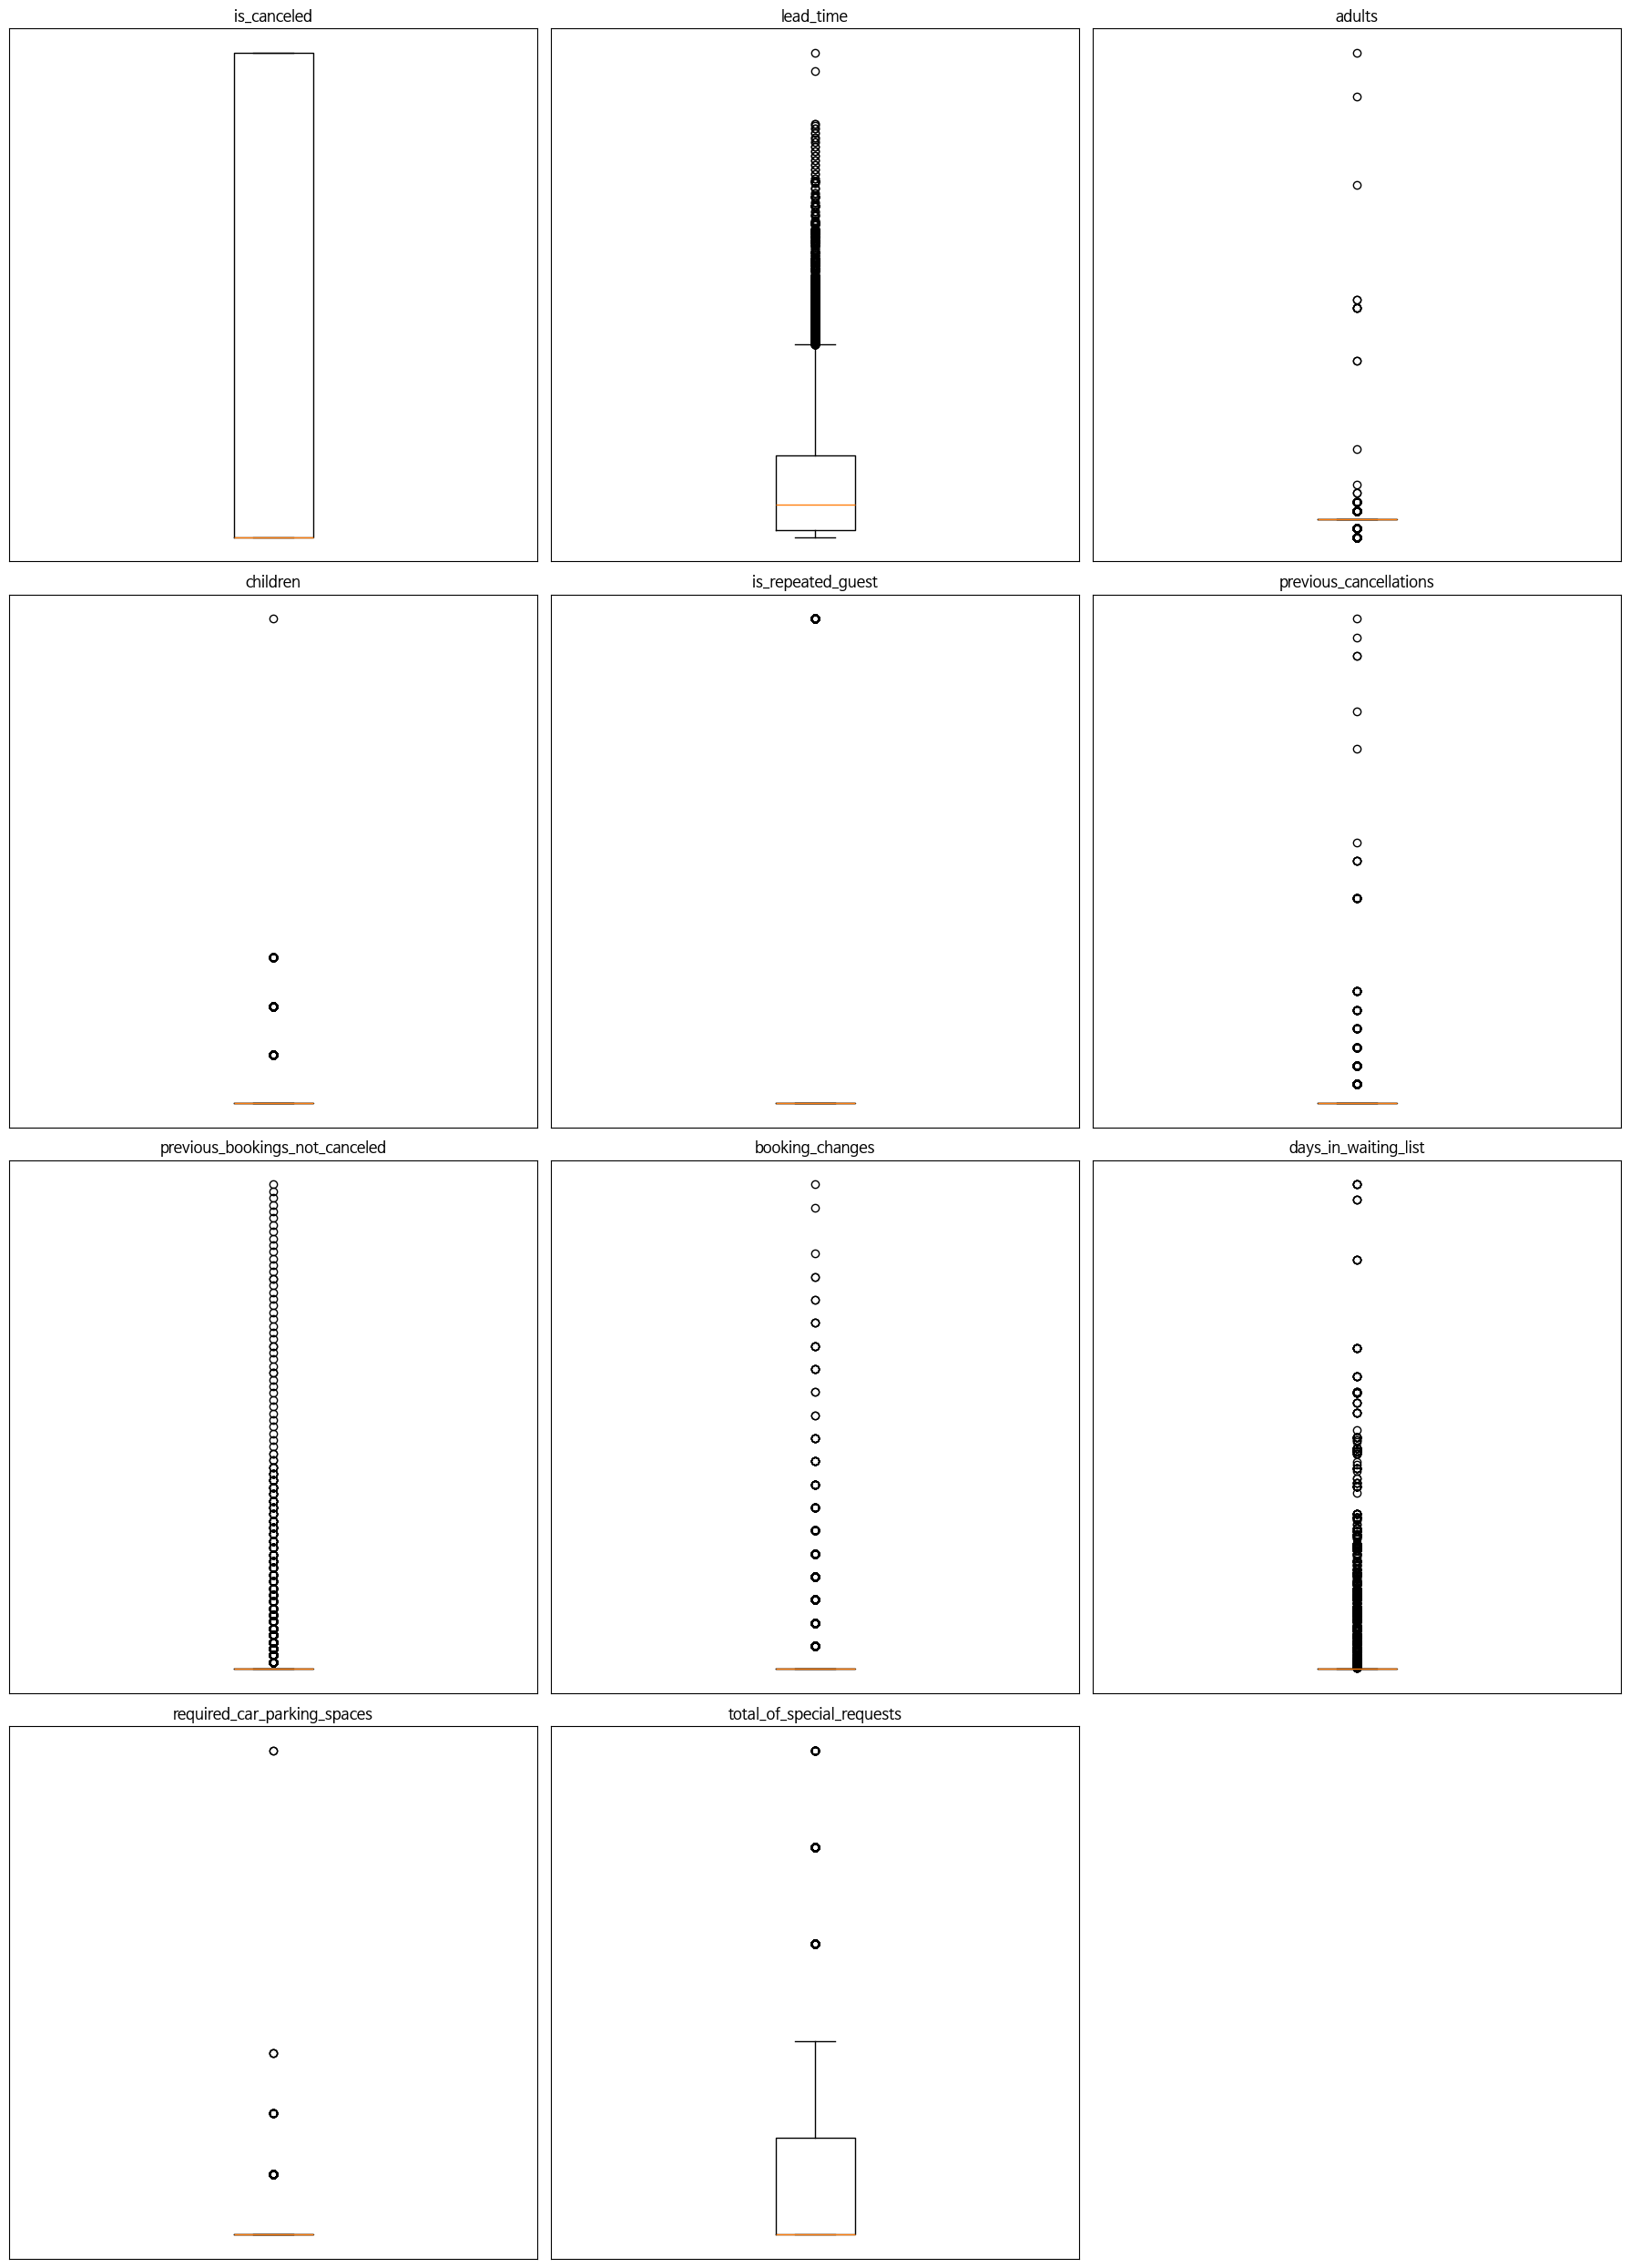

In [ ]:
selected_cols = ['is_canceled', 'lead_time', 'adults', 'children',
                 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(18,25))

for idx, col in enumerate(selected_cols, 1): # selected_cols리스트의 index와 값을 같이 호출 # enumerate(): index와 data로 가지고 오고 싶을 때
    plt.subplot(4, 3, idx)
    plt.boxplot(df[col]) # ,dropna() : 데이터에 결측치가 있다면 뺴기
    plt.title(f"{col}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

####① ['lead_time']의 이상치 찾기

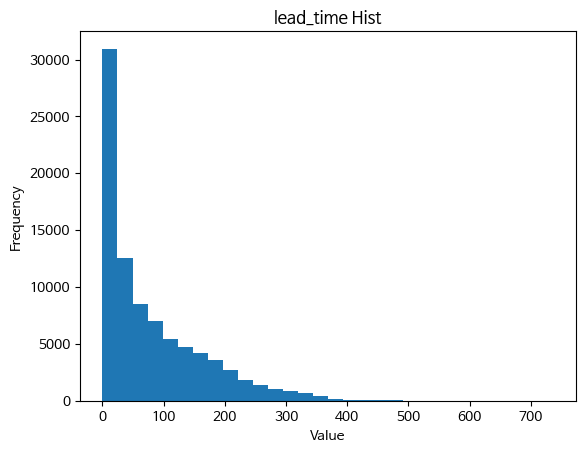

In [ ]:
plt.hist(df['lead_time'], bins=30)
plt.title("lead_time Hist")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print(df['lead_time'].value_counts().to_string())

lead_time
0      5925
1      3191
2      1918
3      1696
4      1558
5      1411
6      1288
7      1177
8      1011
12      909
11      896
9       890
10      855
14      816
16      797
17      768
13      752
15      709
18      708
19      686
20      647
28      615
21      611
29      603
22      596
26      586
31      576
35      570
24      570
34      567
23      566
40      548
25      544
33      543
32      538
27      537
30      531
36      528
39      486
41      481
47      465
37      457
38      452
45      446
44      444
43      417
53      414
42      408
50      404
49      403
46      397
48      393
56      387
55      385
54      380
57      372
61      367
64      366
60      366
59      360
52      358
72      352
68      350
62      349
51      346
63      345
65      343
69      343
58      338
67      332
66      331
73      326
98      324
74      317
88      311
70      309
82      307
75      307
77      305
83      300
76      297
79      297
80    

❗️이상치 분석

    🟢 0 : 당일 예약은 이상하지 않다.
    🟢 큰 값 : 오래전에 예약해 놓은 경우도 있다.
    ➡️ 우선 'lead_time'의 이상치는 제거하지 않고 상관관계를 뒤에서 분석한다.

####② ['adults']의 이상치 찾기

<Figure size 50000x4000 with 0 Axes>

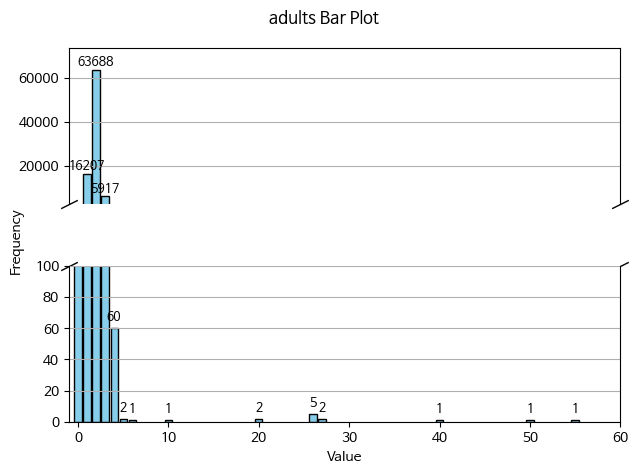

In [ ]:
counts = df['adults'].value_counts().sort_index()

plt.figure(figsize=(500,40))
figure, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

bars1 = ax1.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
ax1.set_ylim(2500, counts.max() + 10000)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', bottom=False, labelbottom=False)

bars2 = ax2.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
ax2.set_ylim(0, 100)
ax2.spines['top'].set_visible(False)

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.yaxis.grid()
ax2.yaxis.grid()

for bar in bars1:
    height = bar.get_height()
    if height > 2500:
        ax1.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    if height < 100:
        ax2.text(bar.get_x() + bar.get_width() / 2, height + 2,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

figure.suptitle("adults Bar Plot")
figure.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical')
plt.xlabel("Value")
plt.xlim(-1, counts.index.max() + 5)
plt.tight_layout()
plt.show()

In [ ]:
print(df['adults'].mean())
print(df['adults'].max())

1.8774443323944314
55


In [ ]:
# IQR 방식으로 이상점 찾기 - adults
q1 = df['adults'].quantile(0.25)
q3 = df['adults'].quantile(0.75)

IQR = q3 - q1

# 이상점 조건 설정
outliers = (df['adults'] < (q1 - 1.5 * IQR)) | (df['adults'] > (q3 + 1.5 * IQR))

# 이상치점 개수 확인
print("이상점 개수: ", outliers.sum())

print(df[outliers]["adults"])

이상점 개수:  22583
2         1
3         1
20        1
30        1
34        3
         ..
119370    1
119372    1
119376    3
119382    3
119386    3
Name: adults, Length: 22583, dtype: int64


In [ ]:
print(df['adults'].value_counts().sort_index())

adults
0       383
1     16207
2     63688
3      5917
4        60
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: count, dtype: int64


In [ ]:
print(f"adults       0 명 : {(df['adults'] == 0).sum()}")
print(f"adults     1~4 명 : {((df['adults'] >= 1) & (df['adults'] <= 4)).sum()}")
print(f"adults     5~6 명 : {((df['adults'] >= 5) & (df['adults'] <= 6)).sum()}")
print(f"adults  10 명 이상 : {(df['adults'] >= 10).sum()}")

adults       0 명 : 383
adults     1~4 명 : 85872
adults     5~6 명 : 3
adults  10 명 이상 : 13


❗️이상치 분석

    ⚠️ 0명 : 383개
    🟢 1~4명 : 85,872개
    ⚠️ 5~6명 : 3개
    ⚠️ 10~55명 : 13개

    ➡️ 0명, 5~6명, 10명 이상의 값이 이상하다. 이 데이터가 예약 취소와 관련있는 지 분석할 필요가 있다.

In [ ]:
overall_cancel_rate = df['is_canceled'].mean() * 100

zero_adults_rate = df[df['adults']==0]['is_canceled'].mean() * 100

normal_adults_rate = df[(df['adults']>1) & (df['adults']<10)]['is_canceled'].mean() * 100

many_adults_rate = df[df['adults']>=10]['is_canceled'].mean() * 100

print(f"전체 취소율: {overall_cancel_rate:.2f}%")
print(f"adults==0 취소율: {zero_adults_rate:.2f}%")
print(f"adults 1~9 취소율: {normal_adults_rate:.2f}%")
print(f"adults>=10 취소율: {many_adults_rate:.2f}%")

전체 취소율: 27.69%
adults==0 취소율: 25.33%
adults 1~9 취소율: 29.56%
adults>=10 취소율: 100.00%


In [ ]:
corr, p_value = pearsonr(df['adults']>6, df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: 0.02, 유의확률: 0.0000


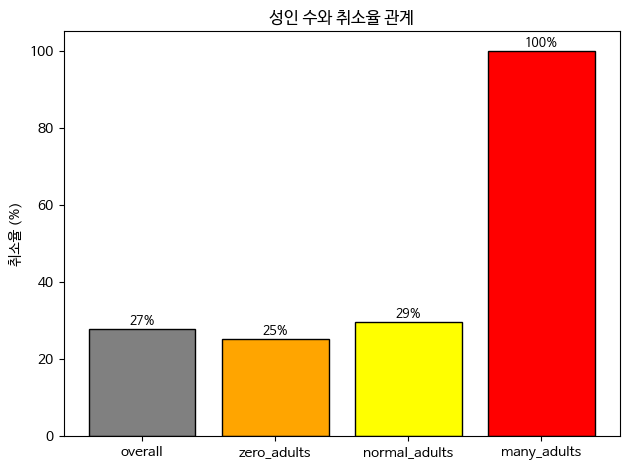

In [ ]:
rates = [
    overall_cancel_rate,
    zero_adults_rate,
    normal_adults_rate,
    many_adults_rate
]

labels = ["overall","zero_adults", "normal_adults", "many_adults"]

bars=plt.bar(labels, rates, color=['gray', 'orange', 'yellow', 'red'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}%', ha='center', va='bottom', fontsize=9)


plt.ylabel("취소율 (%)")
plt.title("성인 수와 취소율 관계")
plt.tight_layout()
plt.show()

❗️이상치 분석

    ✅ p-value : 0.0000 < 0.05임. ➡️ 유의미한 결과는 있음.
    ✔️ 상관계수 : 0.02임. ➡️ 영향력은 매우 작음.
    ✔️ 13건임. ➡️ 전체(119,390건)에 비해 극소수의 값임.

    ➡️ 이상치로 판단하고 제거한다.

In [ ]:
print(df['adults'].value_counts())

adults
2     63688
1     16207
3      5917
0       383
4        60
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64


In [ ]:
df = df.drop(df[df['adults'] >= 10].index)

In [ ]:
print(df['adults'].value_counts())

adults
2    63688
1    16207
3     5917
0      383
4       60
5        2
6        1
Name: count, dtype: int64


In [ ]:
df[df['adults']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0,A,I,1,0.0,0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,A,I,0,0.0,0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,A,C,0,38.0,0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,0,A,A,1,308.0,122,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,0,A,C,1,308.0,122,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,...,0,B,A,0,9.0,0,0,1,Check-Out,2017-07-31
117274,City Hotel,0,276,2017,July,31,30,2,1,0,...,0,B,B,1,9.0,0,0,2,Check-Out,2017-08-02
117303,City Hotel,0,291,2017,July,30,29,2,2,0,...,0,B,A,0,9.0,0,0,1,Check-Out,2017-08-02
117453,City Hotel,0,159,2017,July,31,31,1,3,0,...,0,A,A,1,9.0,0,0,1,Check-Out,2017-08-04


####③ ['children']의 이상치 찾기

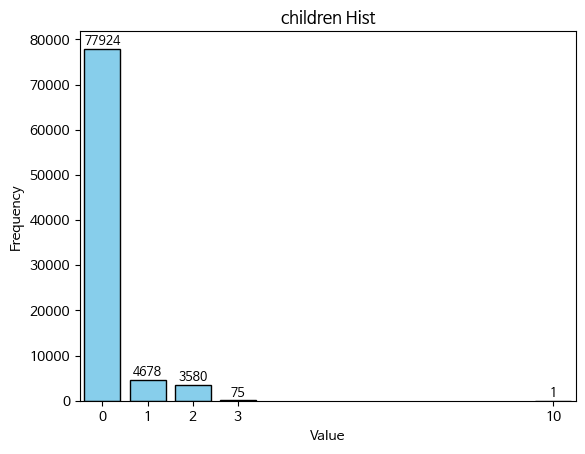

In [ ]:
counts = df['children'].value_counts().sort_index()
bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title("children Hist")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(counts.index)
plt.xlim(-0.5, counts.index.max() + 0.5)
plt.show()

In [ ]:
print(df['children'].value_counts())

children
0.0     77924
1.0      4678
2.0      3580
3.0        75
10.0        1
Name: count, dtype: int64


❗️이상치 분석

    ⚠️ 10명 : 1개

    ➡️ 10명의 아이는 이상치라고 볼 수 있다. 삭제할 필요가 있다.

children 의 10.0 인 row 삭제

In [ ]:
df = df.drop(df[df['children'] == 10.0].index)

In [ ]:
print(df['children'].value_counts())

children
0.0    77924
1.0     4678
2.0     3580
3.0       75
Name: count, dtype: int64


#### ④ adults / children / babies 사람 수

In [ ]:
filter_people = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
df[filter_people]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0,A,I,1,0.0,0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,A,I,0,0.0,0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,A,C,0,38.0,0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,0,A,A,1,308.0,122,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,0,A,C,1,308.0,122,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,0,A,A,1,7.0,0,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,E,K,0,0.0,0,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,0,A,K,2,425.0,0,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,0,A,K,1,9.0,0,0,1,Check-Out,2017-07-22


❗️이상치 분석

    ⚠️ 어른 0명 & 어린이 0명 & 아기 0명 : 166개

    ➡️ 사람이 없는 값은 이상치라고 볼 수 있다. 삭제할 필요가 있다.

In [ ]:
df = df[~filter_people]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,0.0,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,0.0,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,0.0,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,304.0,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,240.0,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,A,A,0,394.0,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,E,E,0,9.0,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,D,D,0,9.0,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,A,A,0,89.0,0,0,0,Check-Out,2017-09-07


In [ ]:
filter_people = (df['adults'] == 0) & ((df['children'] + df['babies']) == 0)
df[filter_people]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


####⑤ ['total_of_special_requests']의 이상치 찾기

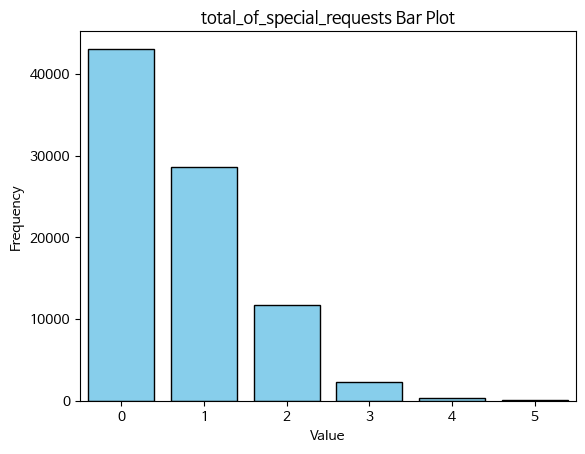

In [ ]:
counts = df['total_of_special_requests'].value_counts().sort_index()
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title("total_of_special_requests Bar Plot")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(counts.index)
plt.xlim(-0.5, counts.index.max() + 0.5)
plt.show()

❗️이상치 분석

    - 고객이 호텔에 요청사항을 남기는게 0~5건으로 집계되었다.
      🟢 이상하게 튀는 값은 없는 것으로 판단된다.
    

####⑥ ['required_car_parking_spaces']의 이상치 찾기

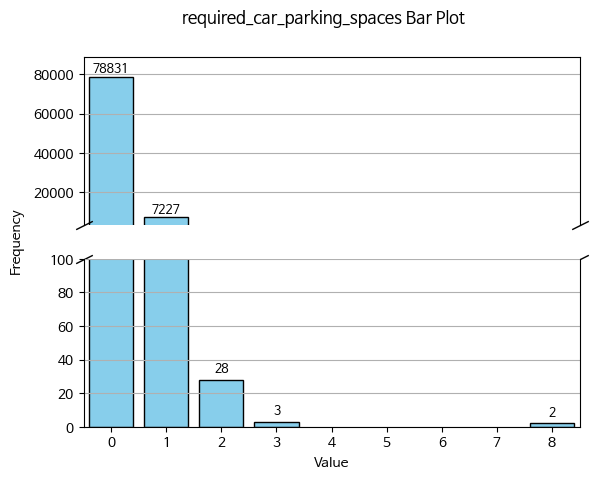

In [ ]:
counts = df['required_car_parking_spaces'].value_counts().sort_index()

figure, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

bars1 = ax1.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
ax1.set_ylim(3000, counts.max() + 10000)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', bottom=False, labelbottom=False)

bars2 = ax2.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
ax2.set_ylim(0, 100)
ax2.spines['top'].set_visible(False)

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.yaxis.grid()
ax2.yaxis.grid()

for bar in bars1:
    height = bar.get_height()
    if height > 3000:
        ax1.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    if height < 100:
        ax2.text(bar.get_x() + bar.get_width() / 2, height + 2,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

figure.suptitle("required_car_parking_spaces Bar Plot")
figure.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical')
plt.xlabel("Value")
plt.xlim(-0.5, counts.index.max() + 0.5)
plt.show()

In [ ]:
print(df['required_car_parking_spaces'].value_counts())

required_car_parking_spaces
0    78831
1     7227
2       28
3        3
8        2
Name: count, dtype: int64


In [ ]:
df[df['required_car_parking_spaces']==8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,...,2,E,I,1,0.0,0,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,...,2,E,F,1,0.0,122,8,0,Check-Out,2017-03-23


❗️이상치 분석

    ⚠️ 주차공간 8대 요구 : 2개

    ➡️ 성인 2명인데 주차공간 8대 요구는 이상치라고 볼 수 있다. 삭제할 필요가 있다.

In [ ]:
df = df.drop(df[df['required_car_parking_spaces'] == 8].index)

In [ ]:
print(df['required_car_parking_spaces'].value_counts())

required_car_parking_spaces
0    78831
1     7227
2       28
3        3
Name: count, dtype: int64


#### ⑦ ['booking_changes']의 이상치 찾기

In [ ]:
print(df['booking_changes'].value_counts())

booking_changes
0     70539
1     10660
2      3444
3       856
4       346
5       112
6        57
7        29
8        14
9         8
10        6
13        5
15        3
14        3
17        2
16        2
12        1
18        1
11        1
Name: count, dtype: int64


##4) 취소 건과 상관관계 분석

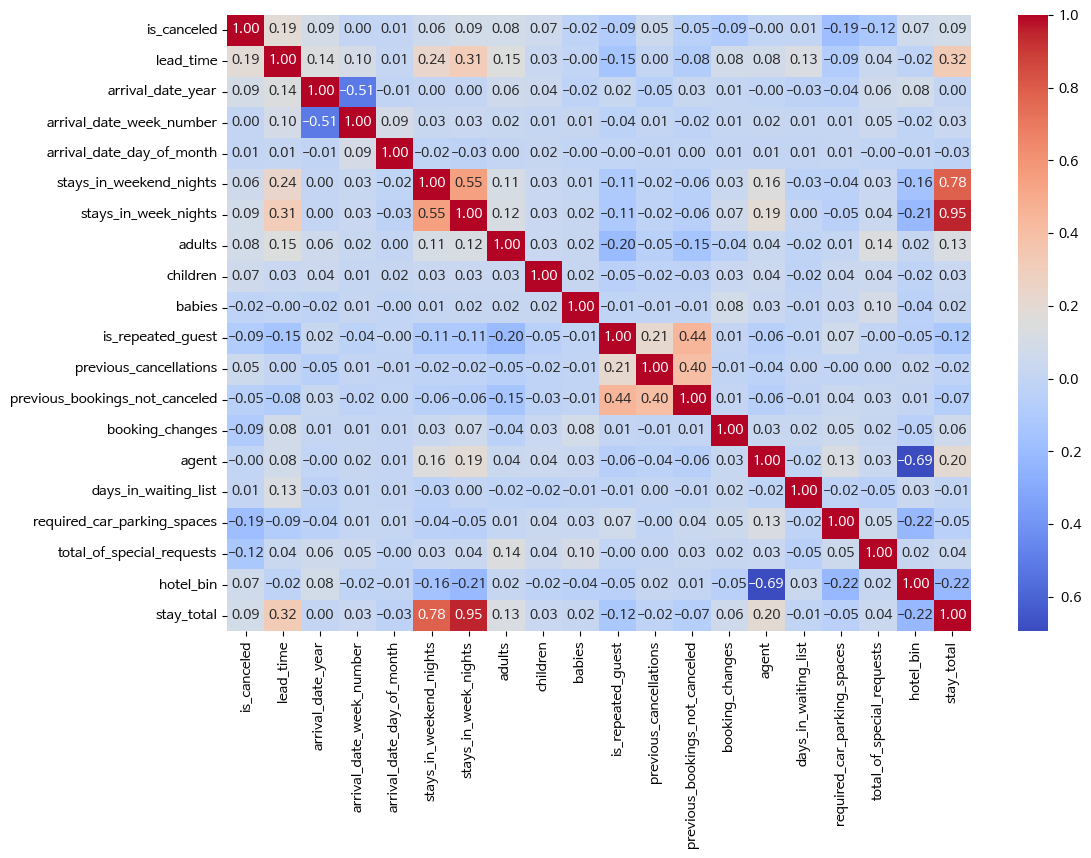

In [ ]:
corr = df.select_dtypes(include="number").corr() # 수치형 변수만 선택하여 상관관계를 계산

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")   # annot=True 수치를 함께 표시, cmap="coolwarm":직관적으로 색상 구분

plt.show()

### (1) 호텔 유형과 관계

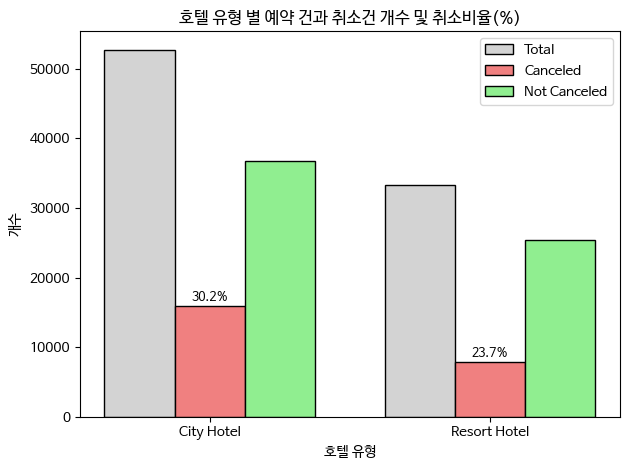

In [ ]:
count_total = df['hotel'].value_counts()

count_cancel_by_hotel = df.groupby("hotel")["is_canceled"].sum()
count_not_canceled = count_total - count_cancel_by_hotel

hotel_data = pd.DataFrame({
    "Total": count_total,
    "Canceled": count_cancel_by_hotel,
    "Not Canceled": count_not_canceled
})

labels = hotel_data.index
x = np.arange(len(labels))
width = 0.25

figure, ax = plt.subplots()

bar1 = ax.bar(x - width, hotel_data['Total'], width, label="Total", color="lightgray", edgecolor='black')
bar2 = ax.bar(x, hotel_data['Canceled'], width, label="Canceled", color="lightcoral", edgecolor='black')
bar3 = ax.bar(x + width, hotel_data['Not Canceled'], width, label="Not Canceled", color='lightgreen', edgecolor='black')

for i, bar in enumerate(bar2):
    total = hotel_data['Total'].iloc[i]
    canceled = hotel_data['Canceled'].iloc[i]
    cancel_rate = (canceled / total) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
            f'{cancel_rate:.1f}%', ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.title("호텔 유형 별 예약 건과 취소건 개수 및 취소비율(%)")
plt.xlabel("호텔 유형")
plt.ylabel("개수")
plt.tight_layout()
plt.show()

In [ ]:
df['hotel_bin'] = (df['hotel'] == 'City Hotel').astype(int)
corr, p_value = pearsonr(df['hotel_bin'], df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: 0.07, 유의확률: 0.0000


❗️상관관계 분석
    
    - 도심에 있는 호텔의 취소 비율이 6.5% 더 높다.
    - 상관 계수 : 0.07
    - 유의확률 : 0.0000

    ➡️ 호텔 유형과 취소 건은 약한 양의 상관관계를 가진다.
    🔆 도심 호텔은 비지니스 수요가 많고, 예약 후 취소율이 높은 경향이 있다.


### (2) 시간과 관계

#### 가. 도착 월별 예약 건

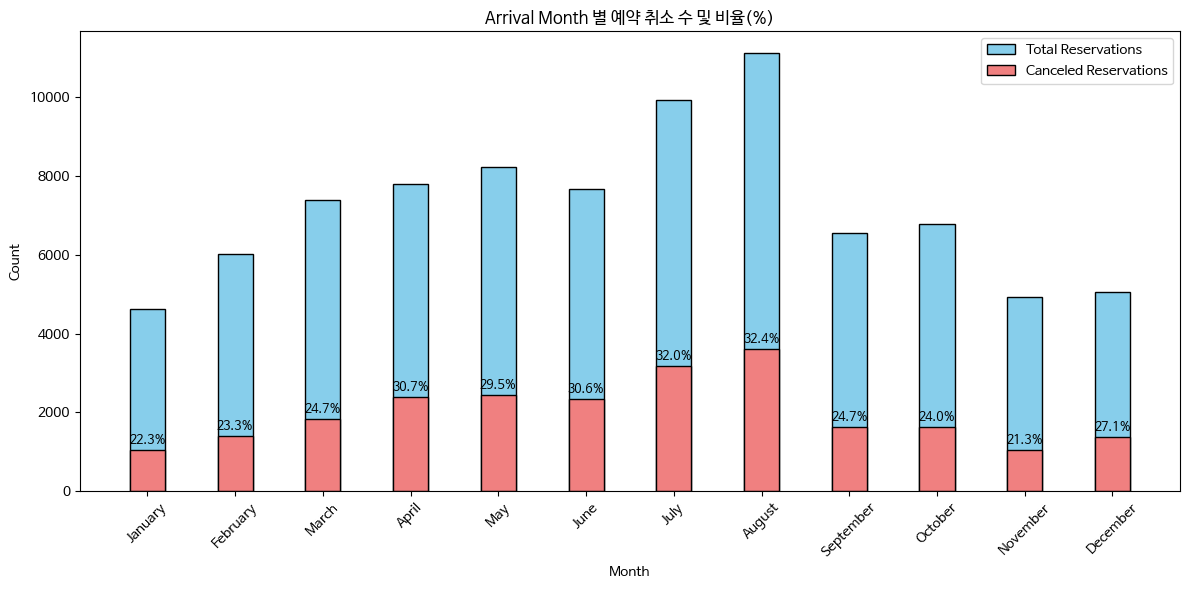

In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

total_month_counts = df['arrival_date_month'].value_counts().reindex(month_order)
cancel_month_counts = df.groupby("arrival_date_month")["is_canceled"].sum().reindex(month_order)
cancel_month_rate = cancel_month_counts / total_month_counts * 100
cancel_month_rate_list = cancel_month_rate.tolist()

x = np.arange(len(month_order))
bar_width = 0.4

plt.figure(figsize=(12,6))
bars1 = plt.bar(x, total_month_counts, width=bar_width, label="Total Reservations", color="skyblue", edgecolor='black')
bars2 = plt.bar(x, cancel_month_counts, width=bar_width, label="Canceled Reservations", color="lightcoral", edgecolor='black')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    rate = cancel_month_rate_list[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.title("Arrival Month 별 예약 취소 수 및 비율(%)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(x, month_order, rotation=45)
plt.tight_layout()
plt.show()

❗️상관관계 분석
    
    - 여름철에 취소 비율이 높아진다.
    - 8월(32.4%), 7월(32.0%), 6월(30.6%)로 각각 1, 2, 4위를 차지했다.
    ➡️ 여름 휴가 시즌에 취소 비율이 높게 나왔다.


#### 나. 도착 주별 예약 건

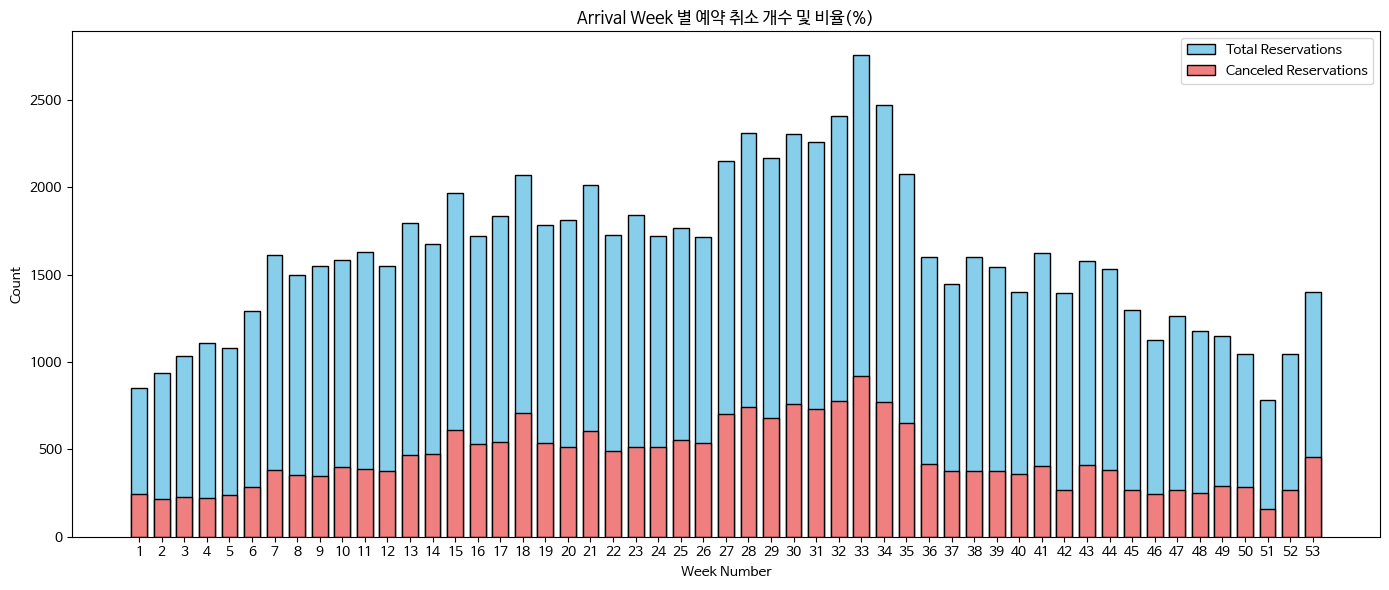

In [ ]:
week_order = sorted(df['arrival_date_week_number'].unique())
total_week_counts = df['arrival_date_week_number'].value_counts().reindex(week_order, fill_value=0)
cancel_week_counts = df.groupby("arrival_date_week_number")["is_canceled"].sum().reindex(week_order, fill_value=0)

cancel_week_rate = cancel_week_counts / total_week_counts * 100
cancel_week_rate_list = cancel_week_rate.tolist()

x = np.arange(len(week_order))
bar_width = 0.7

plt.figure(figsize=(14,6))
bars1 = plt.bar(x, total_week_counts, width=bar_width, label="Total Reservations", color="skyblue", edgecolor='black')
bars2 = plt.bar(x, cancel_week_counts, width=bar_width, label="Canceled Reservations", color="lightcoral", edgecolor='black')

'''
for i, bar in enumerate(bars2):
    height = bar.get_height()
    rate = cancel_week_rate_list[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=9)
'''

plt.legend()
plt.title("Arrival Week 별 예약 취소 개수 및 비율(%)")
plt.xlabel("Week Number")
plt.ylabel("Count")
plt.xticks(x, week_order)
plt.tight_layout()
plt.show()

❗️상관관계 분석
    
    - 여름철에 취소비율이 높아진다.
    - 8월(31~35주차), 7월(27~30주차)가 높게 나왔다.
    - 18주차(5월)와 53주차(12월)에도 근처 주차보다 비교적 높게 나왔다.
    ➡️ 휴가 시즌과 연말 시즌에 취소 비율이 높게 나왔다.


#### 다. 숙박/예약한 주중/주말 밤 수별 예약 건

In [ ]:
print(df['stays_in_week_nights'].unique())

[ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34]


In [ ]:
print(df['stays_in_week_nights'].value_counts().head(10))

stays_in_week_nights
1     21916
2     20469
3     16047
5      9458
4      7770
0      6044
6      1355
10      948
7       943
8       600
Name: count, dtype: int64


In [ ]:
print(df['stays_in_weekend_nights'].unique())

[ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]


In [ ]:
print(df['stays_in_weekend_nights'].value_counts())

stays_in_weekend_nights
0     34638
2     26011
1     22354
4      1685
3      1123
6       110
5        68
8        58
7        14
9         9
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: count, dtype: int64


##### ① 에러 데이터 찾기 1

In [ ]:
df[(df['stays_in_week_nights']>=6) & (df['stays_in_weekend_nights'] <=1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_bin


📊 주중이 6일 이상인데, 주말이 0인 데이터

     - week가 6일 이상이면, weekend가 2일은 있어야 함.
     - ✅ 그렇지 않은 데이터가 있는 지 확인했는데 없었음.

##### ② 에러 데이터 찾기 2

In [ ]:
df[(df['stays_in_weekend_nights']>=3) & (df['stays_in_week_nights'] <5)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_bin


📊 주말이 3일 이상인데, 주중이 0인 데이터

    - weekend가 3일 이상이면, week가 5일 이상이어야 함.
    - ✅ 그렇지 않은 데이터가 있는 지 확인했는데 없었음.

##### ③ 주중 : 0일, 주말 : 0일, 취소도 안한 데이터 찾기

In [ ]:
no_stay_no_cancel = df[(df['stays_in_week_nights']==0) & (df['stays_in_weekend_nights']==0) & (df['is_canceled']==0)]
no_stay_no_cancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_bin
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,0.0,0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,0.0,0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,A,H,0,240.0,0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,E,H,0,250.0,0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,A,A,0,0.0,0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,A,A,0,14.0,0,0,0,Check-Out,2017-07-06,1
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,A,A,0,262.0,0,0,0,Check-Out,2017-08-08,1
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,A,A,0,0.0,0,0,0,Check-Out,2017-08-14,1
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,A,K,7,98.0,0,0,0,Check-Out,2017-08-23,1


In [ ]:
print(f"Check-out : {len(no_stay_no_cancel[df['reservation_status']=='Check-Out'])}")
print(f"Canceled : {len(no_stay_no_cancel[df['reservation_status']=='Canceled'])}")
print(f"No-Show: {len(no_stay_no_cancel[df['reservation_status']=='No-Show'])}")

Check-out : 567
Canceled : 0
No-Show: 0


##### 종합

In [ ]:
df['stay_total'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
corr, p_value = pearsonr(df['stay_total'], df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: 0.09, 유의확률: 0.0000


In [ ]:
filtered_df = df[df['stay_total'] > 0]
corr, p_value = pearsonr(filtered_df['stay_total'], filtered_df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: 0.08, 유의확률: 0.0000


❗️상관관계 분석
    
    - 주중 : 0일, 주말 : 0일, 취소안한 데이터 : 567건.
    - 그 중, 567건 모두 숙박일일 0일인데, 'check-out'이다.
    ➡️ 이상하거나, 대실일 가능성이 있음 (대실의 개념은 동아시아 쪽에 주로 있음. 현재 이 위치가 어디인지 명확하지 않아서, 이상치로 보는 게 나을 것 같음)


#### 라. lead_time 관련

In [ ]:
corr, p_value = pearsonr(df['lead_time'], df['is_canceled'])
print(f"피어슨 상관계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관계수: 0.19, 유의확률: 0.0000


### (3) 사람 구성과 관계

#### 가. 어른/어린이/아이 와 예약 상태

어른이 0명인데, 어린이/아이가 1명 이상이고,
reservation_status(Check-Out,Canceled, No-Show)와의 관계

In [ ]:
filter_people = (df['adults']==0) & ((df['children'] + df['babies']) > 0)
df[filter_people]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_bin,stay_total
40984,City Hotel,0,1,2015,August,33,10,1,1,0,...,B,1,0.0,0,0,0,Check-Out,2015-08-12,1,2
41048,City Hotel,0,104,2015,August,33,11,0,3,0,...,B,1,7.0,0,0,2,Check-Out,2015-08-14,1,3
41446,City Hotel,0,3,2015,August,34,16,2,0,0,...,B,1,0.0,0,0,1,Check-Out,2015-08-18,1,2
41952,City Hotel,0,15,2015,August,35,28,0,1,0,...,B,0,0.0,0,0,1,Check-Out,2015-08-29,1,1
45158,City Hotel,1,48,2015,October,43,19,1,3,0,...,B,0,13.0,0,0,1,Canceled,2015-09-02,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,...,A,0,9.0,0,0,1,Check-Out,2017-07-31,1,4
117274,City Hotel,0,276,2017,July,31,30,2,1,0,...,B,1,9.0,0,0,2,Check-Out,2017-08-02,1,3
117303,City Hotel,0,291,2017,July,30,29,2,2,0,...,A,0,9.0,0,0,1,Check-Out,2017-08-02,1,4
117453,City Hotel,0,159,2017,July,31,31,1,3,0,...,A,1,9.0,0,0,1,Check-Out,2017-08-04,1,4


전체 취소율: 27.71%
adults==0일 때
No-Show 취소율: 1.38%
Check-Out 취소율: 62.67%
Canceled 취소율: 35.94%


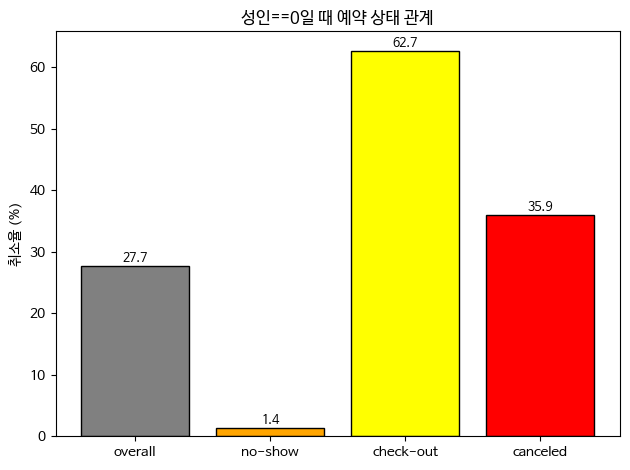

In [ ]:
filter_people = (df['adults'] == 0) & ((df['children'] + df['babies']) > 0)
total_filtered = filter_people.sum()
overall_cancel_rate = df['is_canceled'].mean() * 100

filter_no_show_sum = df[(filter_people) & (df['reservation_status']=="No-Show")].shape[0]
filter_checkout_sum = df[(filter_people) & (df['reservation_status']=="Check-Out")].shape[0]
filter_canceled_sum = df[(filter_people) & (df['reservation_status']=="Canceled")].shape[0]

filter_no_show_rate = filter_no_show_sum / total_filtered * 100
filter_checkout_rate = filter_checkout_sum / total_filtered * 100
filter_canceled_rate = filter_canceled_sum / total_filtered * 100

print(f"전체 취소율: {overall_cancel_rate:.2f}%")
print(f"adults==0일 때")
print(f"No-Show 취소율: {filter_no_show_rate:.2f}%")
print(f"Check-Out 취소율: {filter_checkout_rate:.2f}%")
print(f"Canceled 취소율: {filter_canceled_rate:.2f}%")

rates = [
    overall_cancel_rate,
    filter_no_show_rate,
    filter_checkout_rate,
    filter_canceled_rate
]

labels = ["overall","no-show", "check-out", "canceled"]

bars=plt.bar(labels, rates, color=['gray', 'orange', 'yellow', 'red'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)


plt.ylabel("취소율 (%)")
plt.title("성인==0일 때 예약 상태 관계")
plt.tight_layout()
plt.show()

❗️상관관계 분석

    217건
    - 성인 없이 어린이/아이만 숙박. ➡️ 현실적으로 법적/제도적으로 불가능함.

    그 중 Check-Out 136건
    - 성인 수가 누락되었거나, 입력 오류일 가능성 있음.
    ➡️ agent/distribution_channel 등과 상관관계 분석 필요.

    그 중 No-Show 3건
    - 상관관계 분석 필요.

    그 중 Canceled 78건
    - ‼️ 취소율을 높힌 원인일 가능성이 있음

In [ ]:
filter_people = (df['adults'] == 0) & ((df['children'] + df['babies']) > 0) & (df['reservation_status']=="Check-Out")
filtered_df = df[filter_people]
agent_filtered_counts = filtered_df['agent'].value_counts().sort_values(ascending=False)
print(agent_filtered_counts)

agent
9.0     104
0.0      13
14.0     12
7.0       3
8.0       1
20.0      1
3.0       1
83.0      1
Name: count, dtype: int64


❗️상관관계 분석

    agent 9.0의 시스템 오류일 가능성이 높다.
    ➡️ agent 9.0에게 시스템 점검을 요청해본다.

### (4) country / market_segment / distribution_channel / agent

#### 가. 국가별

In [ ]:
df["country"].value_counts().sort_values(ascending=False)

,count
country,
PRT,27054
GBR,10166
FRA,8750
ESP,7121
DEU,5300
...,...
MRT,1
KIR,1
SDN,1


In [ ]:
df.groupby("country")["is_canceled"].sum().sort_values(ascending=False)

,is_canceled
country,
PRT,9693
GBR,1978
ESP,1843
FRA,1726
ITA,1070
...,...
SLE,0
SMR,0
SLV,0


In [ ]:
total_by_country = df.groupby('country').size().sort_values(ascending=False)
print(total_by_country)

country
PRT    27054
GBR    10166
FRA     8750
ESP     7121
DEU     5300
       ...  
MRT        1
SMR        1
SLE        1
UMI        1
VGB        1
Length: 178, dtype: int64


In [ ]:
total_by_country = df.groupby("country")["is_canceled"].count()

canceled_by_country = df.groupby("country")["is_canceled"].sum()

cancel_rate_by_country = ((canceled_by_country/total_by_country) * 100)

cancel_summary = pd.DataFrame({
    'total_reservation': total_by_country,
    'canceled_reservation': canceled_by_country,
    'cancel_rate(%)': cancel_rate_by_country
})

cancel_summary.sort_values(by='total_reservation', ascending=False)
#cancel_summary = cancel_summary.sort_values(by='cancel_rate(%)', ascending=False)
#print(cancel_summary.head(10))


,total_reservation,canceled_reservation,cancel_rate(%)
country,,,
PRT,27054,9693,35.828343
GBR,10166,1978,19.457014
FRA,8750,1726,19.725714
ESP,7121,1843,25.881196
DEU,5300,1050,19.811321
...,...,...,...
MRT,1,0,0.000000
SMR,1,0,0.000000
SLE,1,0,0.000000


In [ ]:
valid_countries = total_by_country[total_by_country >= 100].index
filter_summary = cancel_summary.loc[valid_countries].sort_values(by='cancel_rate(%)', ascending=False)
filter_summary

,total_reservation,canceled_reservation,cancel_rate(%)
country,,,
AGO,341,192,56.304985
CHN,812,391,48.152709
TUR,211,97,45.971564
MAR,227,104,45.814978
RUS,557,222,39.856373
LUX,260,103,39.615385
BRA,1974,725,36.727457
PRT,27054,9693,35.828343
KOR,118,42,35.593220


In [ ]:
filter_group = df[df['country'].isin(valid_countries)].groupby(['country', 'market_segment', 'distribution_channel'])

total_counts = filter_group['is_canceled'].count()
canceled_counts = filter_group['is_canceled'].sum()
cancel_rate = (canceled_counts / total_counts) * 100

complex_summary = pd.DataFrame({
    'total_reservation': total_counts,
    'cancel_reservation': canceled_counts,
    'cancel_rate(%)': cancel_rate
}).reset_index()

complex_summary = complex_summary[complex_summary['total_reservation']>=50]

complex_summary = complex_summary.sort_values(by='cancel_rate(%)', ascending=False)

complex_summary.head(50)

,country,market_segment,distribution_channel,total_reservation,cancel_reservation,cancel_rate(%)
10,AGO,Online TA,TA/TO,195,147,75.384615
342,PRT,Groups,TA/TO,1734,1097,63.264129
397,TUR,Online TA,TA/TO,166,97,58.433735
291,MAR,Online TA,TA/TO,176,95,53.977273
90,CHN,Online TA,TA/TO,717,387,53.974895
283,LUX,Online TA,TA/TO,203,100,49.261084
340,PRT,Groups,Corporate,157,75,47.770701
215,GRC,Online TA,TA/TO,68,32,47.058824
373,RUS,Online TA,TA/TO,453,212,46.799117
267,ITA,Online TA,TA/TO,2301,1033,44.893525


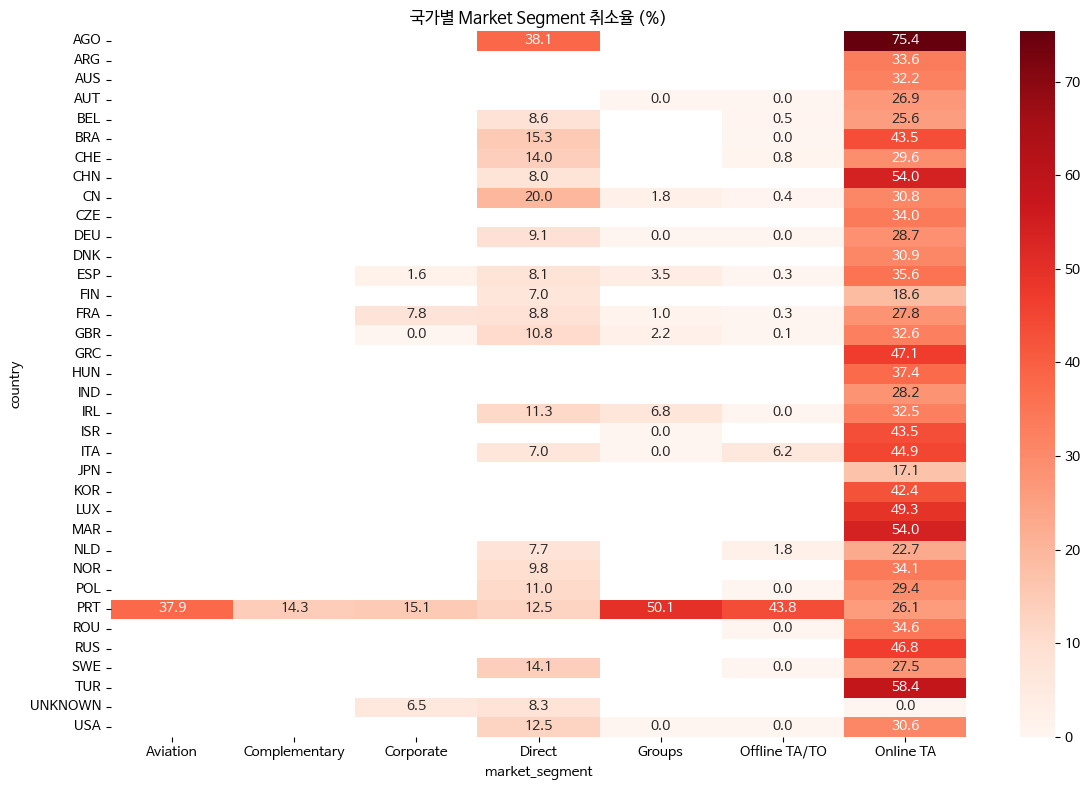

In [ ]:
pivot_market = complex_summary.pivot_table(
    index='country',
    columns='market_segment',
    values='cancel_rate(%)',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_market, annot=True, fmt=".1f", cmap='Reds')
plt.title("국가별 Market Segment 취소율 (%)")
plt.tight_layout()
plt.show()

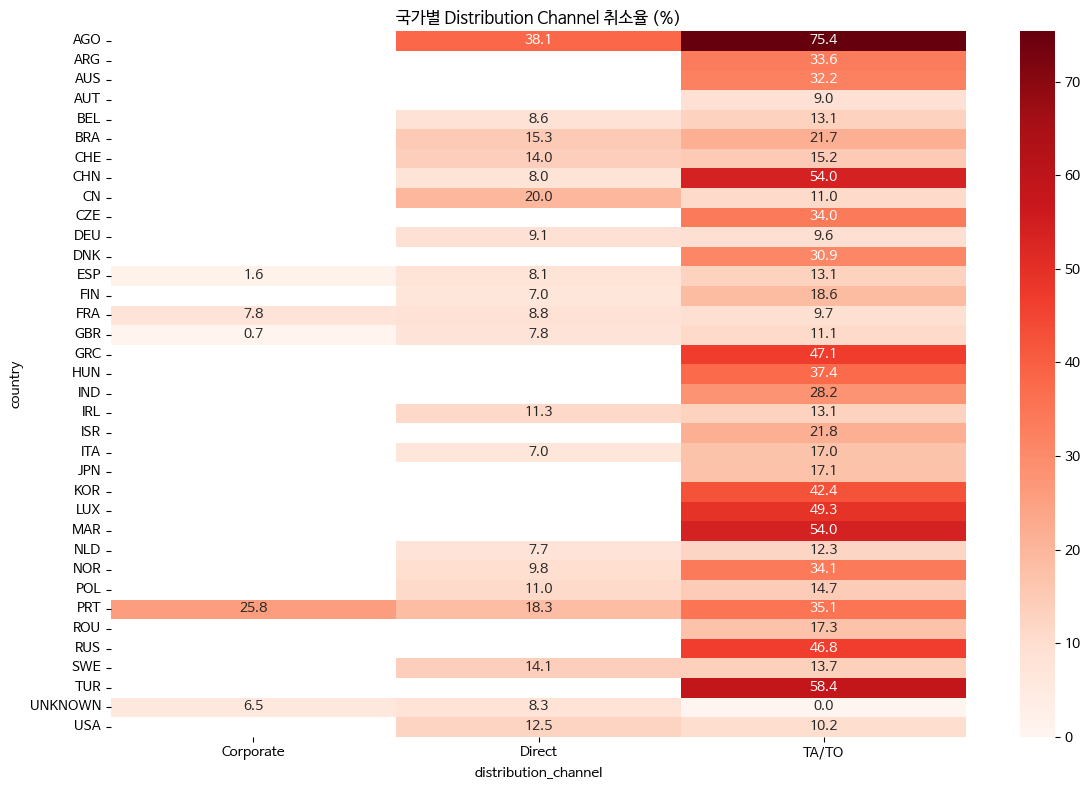

In [ ]:
pivot_channel = complex_summary.pivot_table(
    index='country',
    columns='distribution_channel',
    values='cancel_rate(%)',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_channel, annot=True, fmt=".1f", cmap='Reds')
plt.title("국가별 Distribution Channel 취소율 (%)")
plt.tight_layout()
plt.show()

❗️상관관계 분석
    
    - 👎 Online TA, TA/TO 예약은 대부분의 국가에서 취소율이 높음.
    - 👍 Direct, Corporate 예약은 TA/TO에 비해 안정적이다.
    ➡️ 직접 예약으로 개선 전략을 세우는 것이 좋을 것 같다.


In [ ]:
df[df['country'] == 'PRT']['meal'].value_counts()

,count
meal,
BB,21995
HB,3121
SC,1425
Undefined,258
FB,255


#### 나. market_segment별

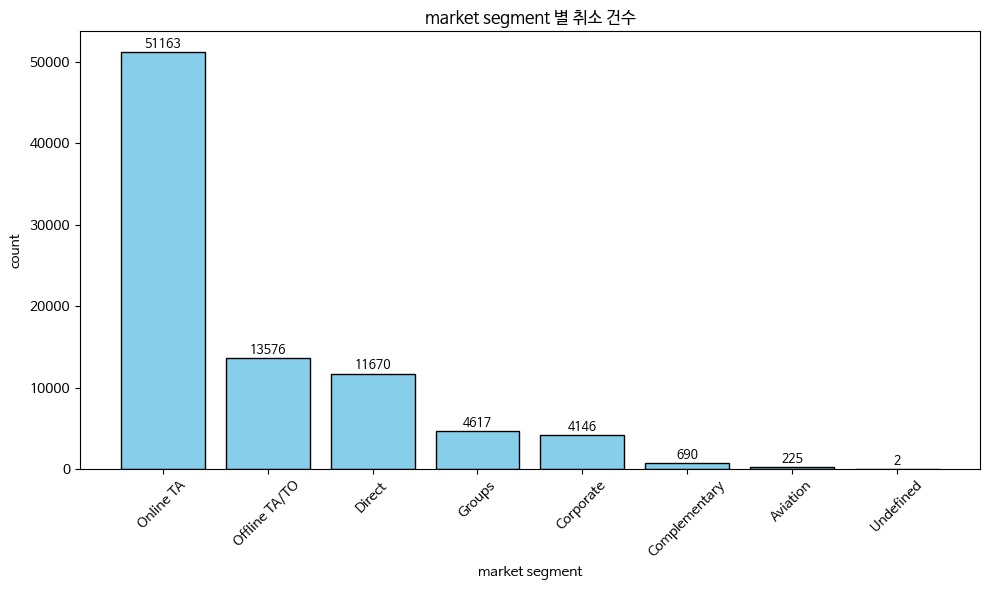

In [ ]:
counts = df.groupby("market_segment")["is_canceled"].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)
plt.title("market segment 별 취소 건수")
plt.xlabel("market segment")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 다. 예약 유통 채널별

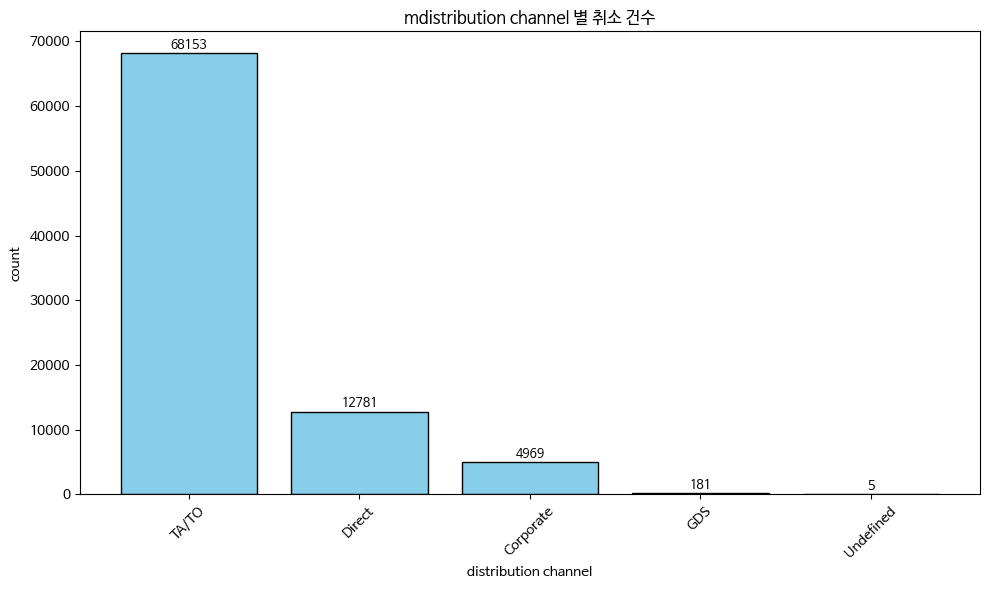

In [ ]:
df.groupby("distribution_channel")["is_canceled"].count()

counts = df.groupby("distribution_channel")["is_canceled"].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)
plt.title("mdistribution channel 별 취소 건수")
plt.xlabel("distribution channel")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 라. Agent별 예약 건과 취소 관계

agent별 취소 분석

In [ ]:
count_total_by_agent = df.groupby("agent")["is_canceled"].count()
count_cancel_by_agent = df.groupby("agent")["is_canceled"].sum()
rate_cancel_by_agent = (df.groupby("agent")["is_canceled"].mean() * 100)

cancel_stats = pd.DataFrame({
    "total_count_by_agent": count_total_by_agent,
    "canceled_count_by_agent": count_cancel_by_agent,
    "cancel rate(%)": rate_cancel_by_agent
})

filter_canceled_rate_by_agent = cancel_stats[cancel_stats["total_count_by_agent"] >= 100].sort_values("cancel rate(%)", ascending=False)

print(filter_canceled_rate_by_agent.head(30))

       total_count_by_agent  canceled_count_by_agent  cancel rate(%)
agent                                                               
9.0                   28527                    11484       40.256599
229.0                   213                       82       38.497653
1.0                    1180                      450       38.135593
240.0                 12904                     4908       38.034718
410.0                   118                       40       33.898305
30.0                    102                       34       33.333333
242.0                   714                      235       32.913165
134.0                   153                       48       31.372549
86.0                    177                       54       30.508475
298.0                   143                       43       30.069930
3.0                     350                      102       29.142857
8.0                    1371                      383       27.935813
273.0                   144       

In [ ]:
df[df['agent'] == 9.0]['lead_time'].describe()

,lead_time
count,28527.000000
mean,81.955060
std,75.294293
min,0.000000
25%,20.000000
50%,60.000000
75%,126.000000
max,389.000000


In [ ]:
df[(df['agent'] == 9.0) & (df['is_canceled']==1)]['lead_time'].describe()

,lead_time
count,11484.000000
mean,98.052769
std,79.318698
min,0.000000
25%,34.000000
50%,76.000000
75%,147.000000
max,389.000000


In [ ]:
df[df['agent'] == 9.0]['total_of_special_requests'].value_counts()

,count
total_of_special_requests,
1,11052
0,10692
2,5574
3,1075
4,121
5,13


In [ ]:
df[(df['agent'] == 9.0) & (df['is_canceled']==1)]['total_of_special_requests'].value_counts()

,count
total_of_special_requests,
0,6559
1,3377
2,1322
3,210
4,16


In [ ]:
df[(df['agent'] == 9.0) & (df['is_canceled'])]['country'].value_counts()

,count
country,
FRA,1437
GBR,1233
ESP,1048
PRT,995
ITA,959
...,...
PRI,1
TMP,1
ETH,1


### (5) 고객 취소한 이전 예약 건과 관계

In [ ]:
print(df['previous_cancellations'].value_counts())

previous_cancellations
0     84425
1      1390
2       110
3        60
4        30
11       27
5        19
6        17
13        4
24        2
26        1
14        1
25        1
19        1
21        1
Name: count, dtype: int64


In [ ]:
prev_cancel_count = df.groupby("previous_cancellations")["is_canceled"].sum()
prev_cancel_count

,is_canceled
previous_cancellations,
0,22733
1,1055
2,34
3,15
4,6
5,2
6,2
11,2
13,3


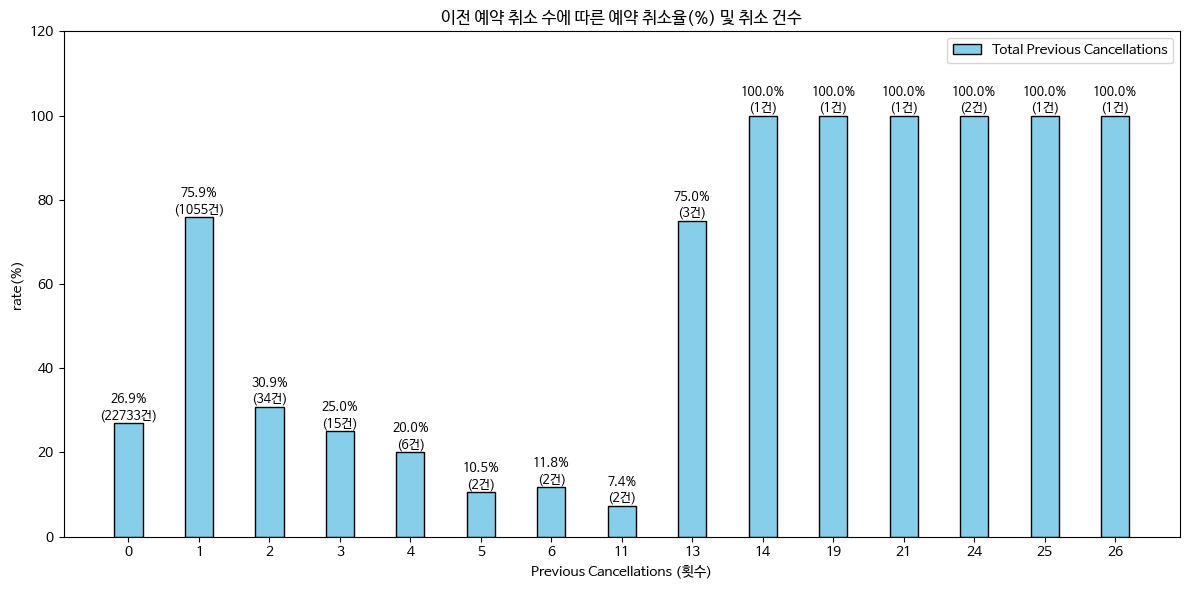

In [ ]:
sorted_index = sorted(df['previous_cancellations'].unique(), reverse=False)

total_prev_cancel_counts = df['previous_cancellations'].value_counts().reindex(sorted_index, fill_value=0)
cancel_prev_cancel_counts = df.groupby("previous_cancellations")["is_canceled"].sum().reindex(sorted_index, fill_value=0)
cancel_prev_cancel_counts_list = cancel_prev_cancel_counts.tolist()
cancel_prev_cancel_rate = cancel_prev_cancel_counts / total_prev_cancel_counts * 100
cancel_prev_cancel_rate_list = cancel_prev_cancel_rate.tolist()

x = np.arange(len(sorted_index))
bar_width = 0.4

plt.figure(figsize=(12,6))
#bars1 = plt.bar(x, total_prev_cancel_counts, width=bar_width, label="Total Previous Cancellations", color="skyblue", edgecolor='black')
#bars2 = plt.bar(x, cancel_prev_cancel_counts, width=bar_width, label="Previous Cancellations", color="lightcoral", edgecolor='black')
bars3 = plt.bar(x, cancel_prev_cancel_rate, width=bar_width, label="Total Previous Cancellations", color="skyblue", edgecolor='black')

for i, bar in enumerate(bars3):
    height = bar.get_height()
    rate = cancel_prev_cancel_rate_list[i]
    cancel_count = cancel_prev_cancel_counts_list[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{rate:.1f}%\n({cancel_count}건)', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.title("이전 예약 취소 수에 따른 예약 취소율(%) 및 취소 건수")
plt.xlabel("Previous Cancellations (횟수)")
plt.ylabel("rate(%)")
plt.xticks(x, sorted_index)
plt.ylim(0, max(cancel_prev_cancel_rate_list)+20)
plt.tight_layout()
plt.show()

In [ ]:
corr_all, p_value_all = pearsonr(df['previous_cancellations'], df['is_canceled'])
corr_overone, p_value_overone = pearsonr(df['previous_cancellations']>0, df['is_canceled'])
print(f"피어슨 상관 계수: {corr_all:.2f}, 유의확률: {p_value_all:.4f}")
print(f"피어슨 상관 계수: {corr_overone:.2f}, 유의확률: {p_value_overone:.4f}")

피어슨 상관 계수: 0.05, 유의확률: 0.0000
피어슨 상관 계수: 0.13, 유의확률: 0.0000


❗️상관관계 분석
    
    - 이전 취소 개수 전체와의 피어슨 상관 계수 : 0.05
    - 이전 취소 개수가 1 이상일 때의 피어슨 상관 계수 : 0.13
    🤔 한 번이라도 취소했던 적이 있는가?
    ➡️ 약하지만, 한번이라도 취소한 적이 있으면 좀 더 뚜렷한 양의 상관관계를 보여줌.

    - p-value : 0.0000
    ➡️ 유의미함.

    ✅ 이전에 취소한 경험이 많을수록, 이번에도 취소할 가능성이 약간 높아지는 경향이 있음.    


### (6) 재방문 고객과 관계

In [ ]:
print(df['is_repeated_guest'].value_counts())

is_repeated_guest
0    82736
1     3353
Name: count, dtype: int64


In [ ]:
count_total_by_repeatedguest = df.groupby("is_repeated_guest")["is_canceled"].count()
count_total_by_repeatedguest

,is_canceled
is_repeated_guest,
0,82736
1,3353


In [ ]:
corr, p_value = pearsonr(df['is_repeated_guest'], df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: -0.09, 유의확률: 0.0000


❗️상관관계 분석
    
    - 재방문 고객과의 피어슨 상관 계수 : -0.09
    🤔 재방문 고객이 취소를 하나?
    ➡️ 약하지만, 재방문고객이 음의 상관관계를 보여줌.

    - p-value : 0.0000
    ➡️ 유의미함.

    ✅ 재방문고객은 신규고객보다 취소를 적게한다.   


### (7) 기타

#### 가. 룸 예약/변경 건과 관계

In [ ]:
print(df['assigned_room_type'].value_counts())

assigned_room_type
A    45547
D    22204
E     7092
F     3604
G     2491
C     2124
B     1785
H      705
I      352
K      184
L        1
Name: count, dtype: int64


In [ ]:
print(df['reserved_room_type'].value_counts())

reserved_room_type
A    55582
D    17209
E     5953
F     2808
G     2047
B      982
C      907
H      595
L        6
Name: count, dtype: int64


In [ ]:
df['is_room_matched'] = (df['reserved_room_type'] == df['assigned_room_type'])
print(df['is_room_matched'].value_counts())

is_room_matched
True     73238
False    12851
Name: count, dtype: int64


In [ ]:
room_matched_canceled_count = ((df['is_canceled']) & (df['is_room_matched'])).sum()
room_mismatched_canceled_count = ((df['is_canceled']) & (df['is_room_matched']==False)).sum()
print(f"방이 일치한 경유 취소 count : {room_matched_canceled_count}")
print(f"방이 불일치한 경유 취소 count : {room_mismatched_canceled_count}")

room_matched_canceled_rate = ((df['is_canceled']) & (df['is_room_matched'])).mean() * 100
room_mismatched_canceled_rate = ((df['is_canceled']) & (df['is_room_matched']==False)).mean() * 100
print(f"방이 일치한 경유 취소 rate : {room_matched_canceled_rate:.2f}%")
print(f"방이 불일치한 경유 취소 rate : {room_mismatched_canceled_rate:.2f}%")

방이 일치한 경유 취소 count : 23245
방이 불일치한 경유 취소 count : 614
방이 일치한 경유 취소 rate : 27.00%
방이 불일치한 경유 취소 rate : 0.71%


#### 나. 예약 대기자 명단 일 수별 예약 건과 관계

In [ ]:
print(df['days_in_waiting_list'].value_counts())

days_in_waiting_list
0      85264
63        51
87        25
58        21
48        21
       ...  
72         1
81         1
74         1
167        1
36         1
Name: count, Length: 127, dtype: int64


In [ ]:
print(df.groupby("days_in_waiting_list")["is_canceled"].sum())

days_in_waiting_list
0      23567
1          3
2          1
3          2
4          2
       ...  
236        1
259        0
330        1
379        1
391        5
Name: is_canceled, Length: 127, dtype: int64


In [ ]:
corr, p_value = pearsonr(df['days_in_waiting_list']==0, df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: -0.02, 유의확률: 0.0000


#### 다. 특별 요청 건과 관계

In [ ]:
print(df['total_of_special_requests'].value_counts())

total_of_special_requests
0    43099
1    28661
2    11681
3     2296
4      316
5       36
Name: count, dtype: int64


In [ ]:
corr, p_value = pearsonr(df['total_of_special_requests'], df['is_canceled'])
print(f"피어슨 상관 계수: {corr:.2f}, 유의확률: {p_value:.4f}")

피어슨 상관 계수: -0.12, 유의확률: 0.0000


#### 라. 식사 유형과 관계

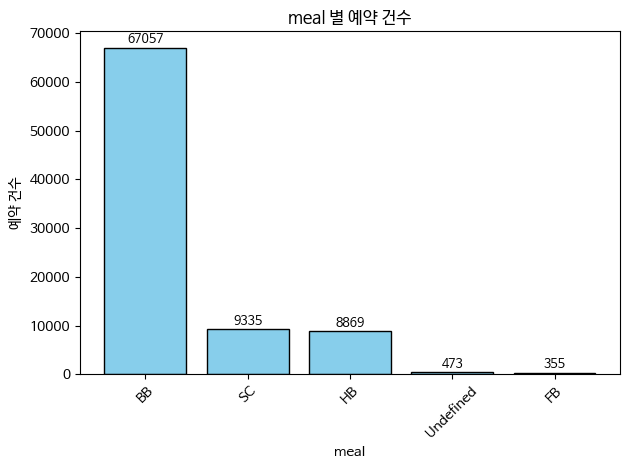

In [ ]:
counts = df.groupby("meal")["is_canceled"].count().sort_values(ascending=False)

bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)
plt.title("meal 별 예약 건수")
plt.xlabel("meal")
plt.ylabel("예약 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


_____

# 🔍 결론

## 📊 상관관계 분석

1. 🏨 호텔 유형 별 취소율
 - City Hotel의 취소율이 6.5% 더 높음

<br />

2. 📆 Lead Time과 취소율
 - 상관계수 : 0.19

 ➡️ 예약 시점이 빠를수록 취소율이 높음

 ❇️ 조기 예약 혜택 전략이 필요

<br />

3. 🌤️ 월/주 별 패턴
 - 여름철(6~8월) 취소율 30% 이상,
 - 53주(겨울)

 ➡️ 휴가철 및 연말에 변동성이 크다.

 ❇️ 성수기 예약 조건 강화 필요

<br />

4. 🌏 국가별 취소율
 - 중국, 터키, 브라질 등 일부 국가에서 취소율 40% 이상

 ❇️ 국가별 타겟 정책 필요

<br />

5. 📞 예약 채널 & 마켓 세그먼트
 - Online TA, TA/TO 경로의 취소율이 높음.
 - Direct, Corporate는 취소율이 낮음.

 ❇️ 직접 예약 유도 (맴버십 할인 등)

<br />

6. 🛎️ Agent 별 취소율
 - 특정 Agent(9.0, 240.0 등)에서 취소율 40% 이상

 ❇️ 취소율 상위 agent 모니터링 및 계약 재검토

<br />

7. 🫡 재방문 고객과 취소율
 - 재방문 고객은 취소율 낮음
 - 상관계수 : -0.12

 ❇️ 충성 고객 관리, 맴버십 관리

<br />

8. 🤷‍♂️ 취소 경험
 - 취소 경험이 한 번이라도 있다면, 취소율 증가
 - 상관계수 : 0.13

 ❇️ 고객 과거 이력 리스크 관리




## 💪 개선 전략
1.  고객 관리
 - 충성 고객 맴버십 혜택
 - 직접 예약 유도
 - 취소 이력 리스크 관리

2. Agent / 국가
 - 취소율 상위 agent 관리 (인센티브 차등 및 재계약 등)
 - 국가 별 맞춤 정책

3. 비용
 - 얼리버드 혜택
 - 취소 수수료 부과